Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = "N/A"

---

In [2]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# import the factorial function from scipy
from scipy.special import factorial

# HW 1:  Forms of Error



## Question 1:  definition of errors

**(a)**  [4 pts] Write a short python program to calculate and return, the absolute error, relative error and degree of decimal precision (as defined in class) given an object `f` and its approximation `F`.  Note, both `f` and `F` can be numpy arrays.

In [5]:
import numpy as np 

def errors(f,F):
    """ calculate various measures of error of an object f and its approximation F
    
    Parameters
    ----------
    f:  numpy.array (or float)
        array of true values
        
    F: numpy.array
        array of approximate values
        
    Returns
    -------
    
    e: array of absolute errors
    r: array of relative errors
    p: integer array of precisions
    """
    #print(type(f), type(F))
    e = np.array(abs(f-F)) # absolute error
    #print(e)
    #print(type(f)==type(e))
    r = np.array(abs(f-F)/abs(f)) # relative error
    #print(r)
    # precision p is the largest integer such that r <= 5 *10^-p
    p = np.array(-np.log10(r/5))
    p = p.astype(int)
    
    return e, r, p


In [6]:
# Testing Cell (do not copy)

# Test Simple Scalars
e,r,p = errors(numpy.exp(1),2.72)
answer = [0.0017181715409551046, 0.0006320799863232398, 3]
numpy.testing.assert_allclose([e,r,p], answer)
print('passed scalar test')

# Test with array input
x = [1., 2., 3.]
f = numpy.exp(x)
F = [ 2.718,  7.389,  20.085]
e,r,p = errors(f,F)
numpy.testing.assert_allclose(e,[2.81828459e-04, 5.60989307e-05, 5.36923188e-04])
numpy.testing.assert_allclose(r,[1.03678896e-04, 7.59216467e-06, 2.67318315e-05])
numpy.testing.assert_allclose(p,[4, 5, 5])
print('passed array test')

passed scalar test
passed array test


**(b)** [2 pts]  Use your routine to compare the absolute error, relative error and degree of precision for these two rational approximations of $\pi$

* $f = \pi$ and $F = 22 / 7$
* $f = \pi$ and $F = 355 / 113$

Which is more accurate?

In [8]:
# you can put some working code here to generate your answers, but put your answers in the cell below

import math

f = np.array([math.pi, math.pi])
F = np.array([22/7, 355/113])
e,r,p = errors(f,F)
print(e, r, p)
comp = [e[0] < e[1], r[0] < r[1], p[0] < p[1]]
print(comp)
# so 355/113 is more accurate as it has lower absolute error and lower relative error than 22/7


[1.26448927e-03 2.66764189e-07] [4.02499435e-04 8.49136788e-08] [4 7]
[False, False, True]


$F = 355 / 113$ is more accurate as it has lower absolute error and lower relative error than $F = 22 / 7$

**(c)** [6 pts] Write a python routine to find the most accurate $d$ digit rational approximation to $\pi$. i.e. find
two $d$ digit positive integers $m,n$ such that 

$$ F = \frac{m}{n} \sim \pi$$

(hint:  $355/113$ is the best 3-digit rational approximation)

In [9]:
def rational_pi(d):
    ''' Find the best rational approximation to pi ~ m/n where m and n are both d-digit positive integers
    
    Parameters
    ----------
    
    d: int
        number of digits in both m and n
    
    Returns
    -------
    m,n: int
        numerator and denominator of best d digit rational approximation to pi ~ m/n
        
    '''
    # numerator and denominator must have the same number of digits
    n_max = 10**(d) / math.pi # max_n is number of iterations before you want your program to stop at
    # pi*n = 10**d
    min_so_far = math.inf
    ans = [0,0]
    for n in range(10**(d-1),int(n_max)):
        
        # lower bound:
        m_lower = int(n * numpy.pi)
        # upper bound:
        m_upper = math.ceil(n * numpy.pi)
        
        e_low,r_l,p_l = errors(numpy.pi,m_lower/n)
        e_up,r_u,p_u = errors(numpy.pi,m_upper/n)
        
        #print(e_l, e_u)
        pot_min = min(e_low, e_up)
        if pot_min < min_so_far:
            if e_up < e_low:
                m = m_upper
            else:
                m = m_lower
            min_so_far = pot_min
            ans = [m, n]
            
    return ans
            # find some maximum value for n, depends on # digits looking for
            # if d = 3, then 1 x 10^2, this is 1x10^d-1
            # can set limit on either ^ or on m/n = pi
            # n_max = 
            # m = n*pi
            # determine what your n_max is, and then find the m for each n
            # for the entire range of n's if multiply them by pi would return what the m would be for that n
            # the rest is tricks to make it not go on forever
            # break when it gets to n_max
            # define n from 0 to this n_max and go through all of them
            
            

In [10]:
# Testing Cell (do not copy)

# print out best rational approximations and their errors  for d =1-5
for d in range(1,6):
    m,n = rational_pi(d)
    e,r,p = errors(numpy.pi,m/n)
    print('d={}: {}/{} = {}:\t e = {},\t, r = {},\t p= {}'.format(d,m,n,m/n,e,r,p))
    
# Run assertion Tests
numpy.testing.assert_allclose(rational_pi(2),(44, 14))
numpy.testing.assert_allclose(rational_pi(3),(355, 113))
print('\nsuccess!')


d=1: 3/1 = 3.0:	 e = 0.14159265358979312,	, r = 0.04507034144862795,	 p= 2
d=2: 44/14 = 3.142857142857143:	 e = 0.0012644892673496777,	, r = 0.0004024994347707008,	 p= 4
d=3: 355/113 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7
d=4: 3195/1017 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7
d=5: 99733/31746 = 3.1415926415926414:	 e = 1.1997151716514054e-08,	, r = 3.818811997413258e-09,	 p= 9

success!


**(d)** [6 pts] $F = n \log(n) - n$ is Stirling's approximation to  $f = \log(n!)$ for large values of $n$. 
Do the following

* Make a plot showing the relative error and degree of decimal precision for $f$ and $F$ as a function of integer $n$

* Estimate the smallest value of $n$ where Stirling's approximation is good to 4 decimal places of precision.  

**Note**: If you use the `factorial` function imported from `scipy.special`, you will not be able to answer this question.  **Why?**  

**Hint**: However there is another way to evaluate $\log(n!)$ for integer $n$ that will work.

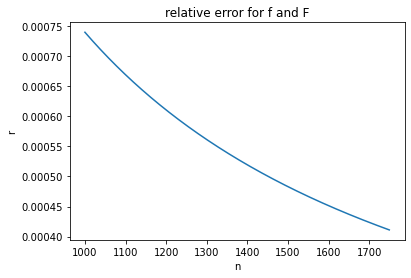

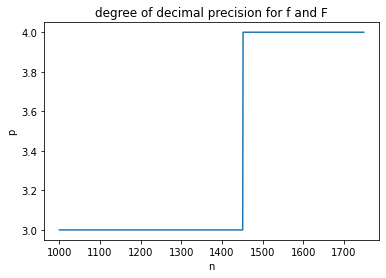

In [11]:
# using the fact that log(n!)=log1+log2+....+logn
def logFactorial(n): # returns value of log(n!)
    n_sum = 0
    for i in range(1,n+1):
        n_sum += np.log(i)
    return n_sum

def stirlingFactorial(n):
    return n*np.log(n) - n
    

# want to find to 4 decimal places, so r <= 5 x 10^-4
n = [i for i in range(1000,1750)]
#print(n)



n_test = 4
ans = logFactorial(n_test) # natural log
#print(ans)


f = np.array([logFactorial(j) for j in n])
F = np.array([stirlingFactorial(k) for k in n])
#print(f)
#print(F)
#print(f, F)
e_test,r_test,p_test = errors(f,F)

plt.plot(n, r_test)
plt.xlabel('n') 
plt.ylabel('r') 
plt.title("relative error for f and F")
plt.show()

plt.plot(n, p_test)
plt.xlabel('n') 
plt.ylabel('p') 
plt.title("degree of decimal precision for f and F")
plt.show()


The smallest value of $ 𝑛$ where Stirling's approximation is good to $4$ decimal places of precision is at ~$1450.$

## Question 2

[4 pts] Given the Taylor polynomial expansions of two functions around $x=0$

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)$$

calculate their sum and product as well as the order of approximation for the truncation error (i.e. determine the exponent that belongs in the $O$).


### sum
$ \frac{1}{1-\Delta x} + \cosh\Delta x = (1+\Delta x + \Delta x^{2} + \Delta x^{3} + O(\Delta x^{4})) + (1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)) \\ $

$
\frac{1}{1-\Delta x} + \cosh\Delta x = 2+\Delta x + \frac{3}{2}\Delta x^{2} + \Delta x^{3} + O(\Delta x^{4})
$

### product 

$ \frac{1}{1-\Delta x} + \cosh\Delta x = (1+\Delta x + \Delta x^{2} + \Delta x^{3}) * (1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!}) + O(\Delta x^{4}) \\ $

$ \frac{1}{1-\Delta x} + \cosh\Delta x = (1+\frac{\Delta x^{2}}{2!} + \frac{\Delta x^{4}}{4!}) + (\Delta x + \frac{\Delta x^{3}}{2!} + \frac{\Delta x^{5}}{4!}) + (\Delta x^2 + \frac{\Delta x^{4}}{2!} + \frac{\Delta x^{6}}{4!}) + (\Delta x^3 + \frac{\Delta x^{5}}{2!} + \frac{\Delta x^{7}}{4!}) + O(\Delta x^{4}) \\ $

$ \frac{1}{1-\Delta x} + \cosh\Delta x = (1+\frac{3}{2}\Delta x^{2} + \frac{3}{2}\Delta x^{3}) + O(\Delta x^{4}) \\ $

### exponent that belongs in the $O$:
$ r = min(4,6)=4 $

## Question 3:  The great Exp challenge...

Here you will attempt to write a function to calculate $e^x$ using its Taylor polynomial approximation expanded around $x_0=0$

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

such that the relative error of $f=e^x$ and $F=T_n(x)$ is of order Machine epsilon ($\epsilon_{machine}$) for  $x\in[-50,50]$.  This problem is actually a bit of a stinker and takes a bit of thought (particularly for $x<0$).  But I'll work you through it.

**(a)** [4 pts] Assume $x> 0$ and show that the upper bound on the *relative error*  at term $n$ 

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|} $$ 
which is equal to 
$$r_n = \frac{|R_n(x)|}{|e^x|} $$

Hence
$$
r_n = \frac{|e^c \Delta x ^{n+1}|} {|(n + 1)!||e^x|} \leq \left| \frac{\Delta x ^{n+1}}{(n + 1)!} \right|$$

We know that the righthand-side term is the upper bound as the max value occurs when $f^{n+1}(c) \geq \left| e^x \right|$, and we can't have  $f^{n+1}(c) \gt \left| e^x \right|$, as $c$ is defined to lie between $x_0$ and $x$: $c \in [x_0, x]$, and so in our case we know that $0 \lt c \leq x$ and so $0 \lt e^c \leq e^x$

**(b)** [4 pts] Analytically show that for **large** $x\gg1$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need *approximately* $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$ (and then this problem is still a bit tricky)

We need to show that:
$$\frac{\Delta x ^{n+1}}{(n + 1)!} \leq \epsilon_{\text{machine}}$$
We then have that:
$$ x ^{n+1} \lt (n + 1)!$$
Taking log on both sides:
$$ (n+1)\log x \lt (n+1)\log (n+1) - (n+1)$$
Then 
$$ \log x \lt \log (n+1) - 1$$ and $$ \log x + 1\lt \log (n+1)$$
And as $e = \text{exp}(1)$, we rewrite the previous inequality as $$ \log (e*x) \lt \log (n+1)$$
For large $n$, we know that $log (n+1) \approx log n$ and so now we can write
$$ \log (e*x) \lt \log (n)$$
which simplifies to $$e*x \lt n$$ and hence we have shown that $n > e \cdot x$

**(c)** [6 pts] Use this result to write a Python function that accurately approximates $e^x$ using $T_n(x)$ for scalar $x$ and returns both the estimate and the number of terms in the series.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$ over the range $x\in[-50,50]$

Make sure to document your code including expected inputs, outputs, and assumptions being made.

Some Hints:
* To make your life easier,  we will assume $x$ and $T_n(x)$ are just of type float (not arrays)
* Think about how we evaluated polynomials efficiently in class
* $T_n(x)$ for $x<0$ is a highly unstable alternating series with severe cancellation issues. However, there is a simple fix that will return accurate solutions independent of the sign of $x$

In [12]:
def Tn_exp(x):
    """ Evaluates polynomial given coefficients p at x
    
    Function to appproximate e^x using Tn(x) for scalar x in order N operations.  
    
    The polynomial is defined as:
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x should be a float.
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """
    # trying to approximate e^x using T_n

    assert(isinstance(x,float))
    
    #print(np.finfo(np.float32).eps) <-- machine epsilon
    
    # P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    x_neg = x < 0
    x = abs(x) # otherwise will be unstable alternating series with cancellation issues
    
    
    eps = numpy.finfo(float).eps
    tolerance = 8 * eps
    
    MAX_N = 120
    p = [1/factorial(n) for n in range(MAX_N)][::-1]
    #print(p)
    
    y = p[0]
    for coefficient in p[1:]: # Horner's method code from lecture notes
        y = y * x + coefficient
    
    Tn = y
    # if x is negative then e^x -> 1/e^x
    if x_neg:
        Tn = 1/Tn
    
    
    # rough estimate of maximum number of steps for large x
    # instead of max_n here need to do a tolerance, r_tol or a_tol
    # if greater than that value then stops
    
    # horner's method: how we evaluated polynomials efficiently in class
    # need to write taylor's expanson of e^x using horner's method
    # T(x) = 1 + x + x^2/2 + x^3/6
    # ^ can write this using Horner's method instead
    # using Horner's method with p=1/n!
    # T_n(x) = 1 + x + x^2/2 + x^3/6
    # p = 1/n! 
    # p(n)1 + p(n)x + p(n)x^2
    
    return Tn, MAX_N

In [13]:
# Feel free to test your code here and/or make a plot of errors

In [14]:
# Testing Cell (do not copy)

x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps
tolerance = 8 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 4.252190255480811 eps_machine
Success!


**(d)** [4 pts] In ieee double precision,  the largest value of $x$ that has $e^x<$ `numpy.finfo(float).max` is about 709 (i.e. `numpy.log(numpy.finfo(float).max))`. 

* What is the relative error in units of machine epsilon for your routine and `f=numpy.exp(709)`
* What is the relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)`

Explain your results

In [15]:
# relative error:
eps = numpy.finfo(float).eps

f1 = np.exp(709)
F1 = Tn_exp(709.0)[0]
r1 = numpy.abs(F1 - f1) / np.abs(f1)
print('relative error in units of eps_machine = {}'.format(r1/eps))

f2 = np.exp(709)
F2 = np.exp(1)**709
r2 = numpy.abs(F2 - f2) / numpy.abs(f2)
print('relative error in units of eps_machine = {}'.format(r2/eps))


relative error in units of eps_machine = 4503599627370496.0
relative error in units of eps_machine = 170.0702257577037


Relative error in units of machine epsilon for your routine and `f=numpy.exp(709)`: $4503599627370496.0$
    
Relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)`: $170.0702257577037$

**(e)** **Extra Credit**

[4 pts] Can you modify your routine for `Tn_exp(x)`) to approximate $e^x$ on the range $x\in[-709, 709]$ to within 16 $\epsilon_{machine}$?


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
x = numpy.linspace(-709, 709, 101)
tolerance = 16 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi, tolerance=tolerance)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

## Question 4

Consider a computing system that uses deoxyribonucleic acid (DNA) to store information.  Given that DNA is formed from the 4 nucleobases adenine, cytosine, guanine, and thymine (uracil is only found in RNA) let us assume that our storage of numbers will be base 4.  Answer the following questions based on this assuming that we have $p=3$ for the mantissa and the exponent $E \in [-3, 3]$ (and we'll pretend DNA has a sign bit...chirality?).

**(a)** [4 pts] How many numbers can we represent with this floating point system (assume it's normalized)?  What are the underflow and overflow limits? What is machine Epsilon?

$N=4, p=3, E\in[-3,3] \\$
normalized numbers, so $d_1 \neq 0$
$$d_1 = [1,2,3], d_2=d_3=[0,1,2,3], E = [-3,-2,-1,0,1,2,3]\\$$


Hence the total number of representations we can have is $2*3*4*4*7+1 = 673$

The underflow limit is $1.00*4^{-3} = 0.015625$ and the overflow limit is $3.33*4^3 = 213.12$

$\epsilon_{mach} = 4^{-1}=0.25$

**(b)** [4pts] Graphically show how the numbers on the decimal real line are distributed.

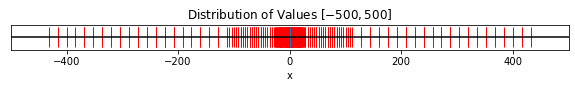

In [19]:
# base 4
d_1_values = [1, 2, 3]
d_2_values = [0, 1, 2, 3]
d_3_values = [0, 1, 2, 3]
E_values = [-3, -2, -1, 0, 1, 2, 3]

fig = plt.figure(figsize=(10.0,1.0))
axes = fig.add_subplot(2, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            for d3 in d_3_values:
                axes.plot( (d1 + d2 + d3 * 0.25) * 4**E, 0.0, 'r|', markersize=20)
                axes.plot(-(d1 + d2 + d3 * 0.25) * 4**E, 0.0, 'r|', markersize=20)
            
axes.plot(0.0, 0.0, '|', markersize=20)

axes.plot([-500.0, 500.0], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values $[-500, 500]$")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-500, 500])

plt.show()
#axes.set_xlim([-10, 10])

**(c)** [4 pts] How many more numbers can we store in $N$ base-pairs (base 4) versus $N$ bits (base 2) where the mantissa and exponent are the same relative length (e.g.  p=3, and $E\in[-3,3]$ for both problems)?

In base $4$, our number of representations with $p=3$ and $E\in[-3,3]$ is $2*3*4*4*7+1=673$

For base $2$, 
$$ d_1 = [1], d_2 = [0,1], d_3=[0,1], E=[-3,-2,-1,0,1,2,3] $$
which gives us $2*1*2*2*7+1=57$ as the number of representations.
Thus, the difference is $673-57=616$ representations.